In [1]:
# 필요 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#출력 그림 크기 조절
sns.set(rc={'figure.figsize':(12,12)})
plt.style.use('ggplot')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

### 세종사전 실행
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
twitter = Twitter()

In [2]:
today = '0916'

In [12]:
df_sns = pd.read_excel("sns데이터/음주운전 트위터.xlsx")
df_sns

,날짜,내용
0,2017-11-18,음주운전 처벌 강화 에 대한 입니다 많은 동의와 공유를 부탁드려봅니다 국민청원
1,2017-11-18,국민 청원 음주운전 처벌을 강화해 주시기 바랍니다
2,2017-11-24,음주운전 사면은 반대입니다 국민청원
3,2017-11-29,평소 뉴스를 보며 음주로 인한 심신미약 어쩌구 하는 대목에 분노하셨던 분들 ...
4,2017-12-27,다음주 국회 본회의까진 가봐야 전안법 어떻게 될지 알음 통과는 됬지만 아직 은 답...
...,...,...
346,2021-01-10,새해 첫날 예비 창업자 목숨 앗아간 음주운전 엄벌해달라 국민청원 국민청원
347,2021-01-10,새해 첫날 예비 창업자 목숨 앗아간 음주운전 엄벌해달라 국민청원 국민청원
348,2021-01-09,월 일 음주 뺑소니에 동생을 잃었습니다 국민청원 다음 뉴스
349,2021-01-09,월 일 음주 뺑소니에 동생을 잃었습니다 국민청원 출처 국민일보 네이...


In [13]:
df = pd.read_csv("blue_text_0811_13000s.csv",encoding = 'cp949')
df

,Num,Class,Title,Date,Support
0,454161,안전/환경,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2020-04-17,2715626
1,454160,안전/환경,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,2020-04-19,2026252
2,454159,정치개혁,자유 한국당 정당해산 청원,2019-05-22,1831900
3,454158,기타,문재인 대통령님을 응원 합니다!,2020-03-27,1504597
4,454157,정치개혁,문재인 대통령 탄핵을 촉구합니다.,2020-03-05,1469023
...,...,...,...,...,...
78846,363287,인권/성평등,용산참사 재조사 및 관련자 처벌,2018-02-25,25
78847,363286,교통/건축/국토,"집값 상승의 폭탄, 개포8 단지 분양에 실거주 의무기간을 삽입해주세요",2018-03-28,25
78848,363285,문화/예술/체육/언론,"라이브 뷰잉에서 믹스, 이엣타이가 등을 넣는 사람들을 엄중 처벌 해주세요",2018-03-28,25
78849,363284,행정,정형식 판사 파면을 촉구합니다.,2018-03-08,25


In [14]:
def word_cloud(text,r,cs):

    ### 단어리스트 만들기
    word_list= text.to_list()
    ### 형태소 분리
    sentences_tag = []

    for sentence in word_list:
       morph = twitter.pos(sentence)
       sentences_tag.append(morph)
    
    ## 명사만 추출
    noun_list = []
    for sentence in sentences_tag:
       for word, tag in sentence:
           if tag in ['Noun']:
               noun_list.append(word)
                
    ## 두 단어 이상만 추출
    len(noun_list)

    noun_list = [n for n in noun_list if len(n) > 1]
    noun_list[:100]
    
    # 불용어 제거
    stopwords = ["청원", '처벌', '대한', '요청', '반대', '국민', '사건', '조사', '촉구', '요구', '불법', '대한민국', '개선', '관련'
             ,'한국','청와대',"뉴스","대한민국",]


    noun_list = [i for i in noun_list if i not in stopwords]
    #print(word_list)
    counts = Counter(noun_list)
    tags = counts.most_common(20)

    
    ### WordCloud 생성
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width=800,
                      height=600)
    
    df_tag = pd.DataFrame(data = tags)
#    df_tag.to_csv("relation/{}_{}.csv".format(cs.split("/")[0],r),index = False, encoding = "cp949")
    display(df_tag[:10].T)
    display(df_tag[10:].T)
    print()
    
    cloud = wordcloud.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
    
    new_data = []
    for i_1 in df_tag[0].unique():
        for i_2 in range(int(df_tag.loc[df_tag[0] == i_1,1])):
            new_data.append(i_1)
    df_new = pd.DataFrame(data = new_data)
    df_new.loc[:,"기간"] = '기간_{}'.format(r)
    display(df_new)
    return df_new

In [15]:
def wc_0908(df1,df2,cs):
    ### 분류명 cs의 top 분류 선정
    temp = df1.loc[df1.Class == cs]
    temp = temp.loc[temp.Support == 154838]
    display(temp)
    print()
    
    ddd = "날짜"
    ttt = "내용"
    
    word_r = pd.DataFrame()
    ## 기간 설정
    temp.Date = pd.to_datetime(temp.Date)
    df2[ddd] = pd.to_datetime(df2[ddd])
    starta = temp.Date -  dt.timedelta(days=61)
    startb = temp.Date - dt.timedelta(days=31)
    startc = temp.Date
    finishc = temp.Date + dt.timedelta(days=31)
    
    display(starta,startb,startc,finishc)
    print()
    
    df_A = df2.loc[df2[ddd].values >= starta.values]
    df_A = df_A.loc[df_A[ddd].values <=startb.values,[ddd,ttt]]
    print(cs, "분야의 청원 작성일 -1일 부터 -30일까지(기간A) {}건 워드클라우드".format(df_A[ttt].count()))
    print()
    if df_A[ttt].count() != 0:
        temp_A = word_cloud(df_A[ttt],'A',cs)
    
    print()
    df_B = df2.loc[df2[ddd].values>startb.values]
    df_B = df_B.loc[df_B[ddd].values <=startc.values,[ddd,ttt]]
    print(cs, "분야의 청원 작성일 당일 부터 +30일까지(기간B) {}건 워드클라우드".format(df_B[ttt].count()))
    print()
    if df_B[ttt].count() != 0:
        temp_B = word_cloud(df_B[ttt],'B',cs)
    
    print()
    df_C = df2.loc[df2[ddd].values>startc.values]
    df_C = df_C.loc[df_C[ddd].values <=finishc.values,[ddd,ttt]]
    print(cs, "분야의 청원 완료일 +1일 부터 +30일까지(기간C) {}건 워드클라우드".format(df_C[ttt].count()))
    print()
    if df_C[ttt].count() != 0:
        temp_C = word_cloud(df_C[ttt],'C',cs)
        
    temp_All = pd.concat([temp_A,temp_B,temp_C],axis=0)
    temp_All = temp_All.loc[:,["기간",0]]
    temp_All = temp_All.rename(columns={0 : "단어"})
    display(temp_All)
#   temp_All.단어 = temp_All.apply(lambda x : x["단어"].split("\'")[1],axis=1)
#    temp_All.to_csv("relation/{}_{}_30.csv".format(cs.split("/")[0],today),index = False, encoding = "cp949")


,Num,Class,Title,Date,Support
279,453881,안전/환경,햄버거 가게 앞에서 대낮음주운전으로 사망한 6살 아이의 엄마입니다. 가해자의 강력한...,2020-11-05,154838


279   2020-09-05
Name: Date, dtype: datetime64[ns]

279   2020-10-05
Name: Date, dtype: datetime64[ns]

279   2020-11-05
Name: Date, dtype: datetime64[ns]

279   2020-12-06
Name: Date, dtype: datetime64[ns]


안전/환경 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 68건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,음주운전,왕리,가해자,배달,사망,엄벌,치킨,동의,사고,음주
1,63,39,33,30,27,27,25,22,21,14


,10,11,12,13,14,15,16,17,18,19
0,역주행,출처,네이버,참변,변호사,구속,운전자,피해자,가장,벤츠
1,13,12,11,10,7,6,6,6,6,6


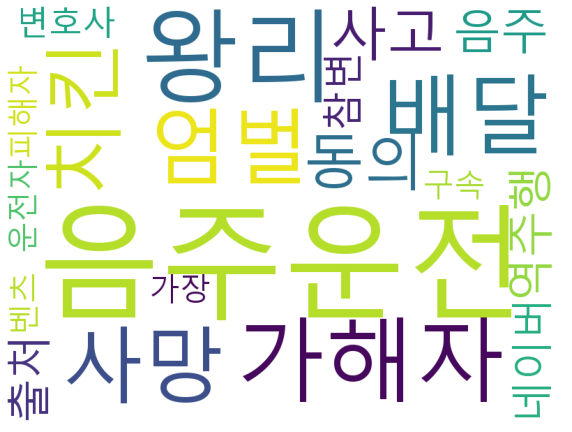

,0,기간
0,음주운전,기간_A
1,음주운전,기간_A
2,음주운전,기간_A
3,음주운전,기간_A
4,음주운전,기간_A
...,...,...
379,벤츠,기간_A
380,벤츠,기간_A
381,벤츠,기간_A
382,벤츠,기간_A



안전/환경 분야의 청원 작성일 당일 부터 +30일까지(기간B) 7건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,음주운전,사망,아이,가해자,엄중,냄새,아들,사고,송민헌,경찰청
1,11,5,5,4,3,3,3,2,2,2


,10,11,12,13,14,15,16,17,18,19
0,차장,엄마,차량,풍기,장례식,가해,운전자,어머니,조문,대낮
1,2,2,2,2,2,2,2,2,2,2


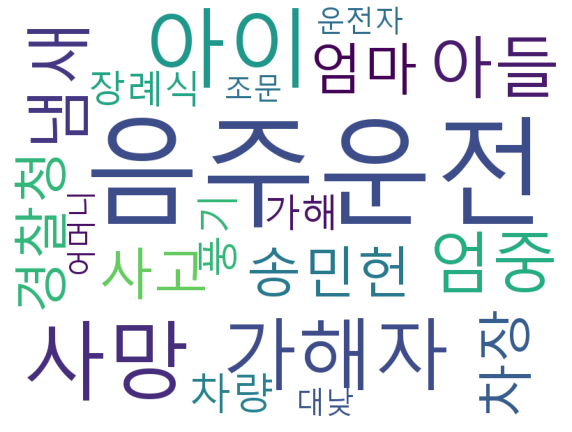

,0,기간
0,음주운전,기간_B
1,음주운전,기간_B
2,음주운전,기간_B
3,음주운전,기간_B
4,음주운전,기간_B
5,음주운전,기간_B
6,음주운전,기간_B
7,음주운전,기간_B
8,음주운전,기간_B
9,음주운전,기간_B



안전/환경 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 6건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,음주운전,친구,차량,부모,사망,대만,학생,동의,사고,한국인
1,8,6,4,4,3,3,3,3,2,2


,10,11,12,13,14,15,16,17,18,19
0,횡단보도,청년,강화,경악,마디,누구,외국인,스토킹,국회,쩡이린
1,2,2,2,2,2,2,2,2,2,1


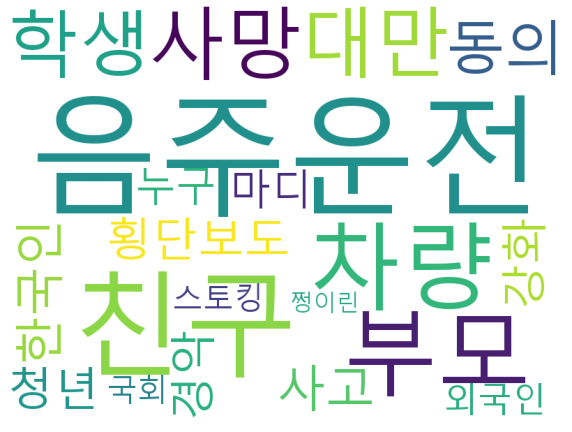

,0,기간
0,음주운전,기간_C
1,음주운전,기간_C
2,음주운전,기간_C
3,음주운전,기간_C
4,음주운전,기간_C
5,음주운전,기간_C
6,음주운전,기간_C
7,음주운전,기간_C
8,친구,기간_C
9,친구,기간_C


,기간,단어
0,기간_A,음주운전
1,기간_A,음주운전
2,기간_A,음주운전
3,기간_A,음주운전
4,기간_A,음주운전
...,...,...
52,기간_C,스토킹
53,기간_C,스토킹
54,기간_C,국회
55,기간_C,국회


In [16]:
# 경제민주화
wc_0908(df,df_sns,"안전/환경")